In [2]:
import rmgpy.molecule as molecule
from IPython.display import display

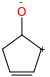

In [3]:
adj = """1  C u0 p0 c0 {2,D} {7,S} {8,S}
2  C u0 p0 c0 {1,D} {3,S} {9,S}
3  C u0 p0 c+1 {2,S} {4,S} {5,S}
4  H u0 p0 c0 {3,S}
5  C u0 p0 c0 {3,S} {6,S} {7,S} {10,S}
6  O u0 p3 c-1 {5,S}
7  C u0 p0 c0 {1,S} {5,S} {11,S} {12,S}
8  H u0 p0 c0 {1,S}
9  H u0 p0 c0 {2,S}
10 H u0 p0 c0 {5,S}
11 H u0 p0 c0 {7,S}
12 H u0 p0 c0 {7,S}"""

mol = molecule.Molecule().fromAdjacencyList(adj)

display(mol)

In [9]:
for atom1 in mol.vertices:
    if atom1.isNOS():
        paths = []
        for atom2, bond12 in atom1.edges.items():
            if (not (atom1.radicalElectrons and atom2.radicalElectrons)  # not allowing both atom1, atom2 to be rads
                    and atom2.isNonHydrogen()):  # don't bother with hydrogen atoms
                    #and (atom2.radicalElectrons > 0 or atom2.charge > 0)):  # atom2 must either be a rad or positively charged
                if bond12.isSingle() or bond12.isDouble():
                    # Find paths in the direction <increasing> the bond order
                    # atom1 must posses at least one lone pair to loose it
                    if ((atom1.isNitrogen() and atom1.lonePairs in [1, 2, 3])
                            or (atom1.isOxygen() and atom1.lonePairs in [2, 3])  # not allowing O with no lonePairs
                            or (atom1.isSulfur() and atom1.lonePairs in [1, 2, 3])):
                        paths.append([atom1, atom2, bond12, 1])  # direction = 1
                if bond12.isDouble() or bond12.isTriple():
                    # Find paths in the direction <decreasing> the bond order
                    # atom1 gains a lone pair, hence cannot have more than two lone pairs
                    if ((atom1.isNitrogen() and atom1.lonePairs in [0, 1, 2])
                            or (atom1.isOxygen() and atom1.lonePairs in [1, 2])
                            or (atom1.isSulfur() and atom1.lonePairs in [0, 1, 2])):
                        paths.append([atom1, atom2, bond12, 2])  # direction = 2
print paths

[[<Atom 'O-'>, <Atom 'C'>, <Bond "1.0">, 1]]


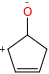

In [12]:
molList = mol.generateResonanceIsomers()

for m in molList:
    display(m)